# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# From the website we get this API call
#url = "api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
city_info = []
print("Beginning Data Retrieval")
print("-------------------------")
for index,city in enumerate(cities):
    city_url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&q={city}&appid={weather_api_key}"
    try:
        data = requests.get(city_url).json()
        print(f"proccesing record number {index} for {city}")
        # Check to see if we can get the weather, if not it should give us an exception
        weather = data["weather"]
        # If we did not get an exception we found data for this city, lets append it
        city_info.append(data)
    except Exception as ex:
        print(f"could not find data for {city}")
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-------------------------
proccesing record number 0 for cambui
proccesing record number 1 for longyearbyen
proccesing record number 2 for bambous virieux
proccesing record number 3 for talnakh
proccesing record number 4 for pevek
proccesing record number 5 for taolanaro
could not find data for taolanaro
proccesing record number 6 for olafsvik
proccesing record number 7 for eirunepe
proccesing record number 8 for carnarvon
proccesing record number 9 for bluff
proccesing record number 10 for colonia
proccesing record number 11 for kapaa
proccesing record number 12 for hobart
proccesing record number 13 for nikolskoye
proccesing record number 14 for wattegama
proccesing record number 15 for arraial do cabo
proccesing record number 16 for pangnirtung
proccesing record number 17 for rikitea
proccesing record number 18 for veinte de noviembre
proccesing record number 19 for maryville
proccesing record number 20 for narasannapeta
proccesing record number 21 for roano

proccesing record number 183 for atuona
proccesing record number 184 for biograd na moru
proccesing record number 185 for sept-iles
proccesing record number 186 for cherskiy
proccesing record number 187 for waslala
proccesing record number 188 for ghimbav
proccesing record number 189 for macaboboni
could not find data for macaboboni
proccesing record number 190 for mahebourg
proccesing record number 191 for bereda
proccesing record number 192 for tuatapere
proccesing record number 193 for vysokogornyy
proccesing record number 194 for manta
proccesing record number 195 for mount isa
proccesing record number 196 for zeya
proccesing record number 197 for bocaranga
could not find data for bocaranga
proccesing record number 198 for balaka
proccesing record number 199 for egvekinot
proccesing record number 200 for hamilton
proccesing record number 201 for owensboro
proccesing record number 202 for vila velha
proccesing record number 203 for shizunai
proccesing record number 204 for rio galle

proccesing record number 364 for namibe
proccesing record number 365 for canyon
proccesing record number 366 for kuche
could not find data for kuche
proccesing record number 367 for kununurra
proccesing record number 368 for aswan
proccesing record number 369 for altagracia de orituco
proccesing record number 370 for beloha
proccesing record number 371 for yelanskiy
proccesing record number 372 for ahipara
proccesing record number 373 for dachnoye
proccesing record number 374 for vila
proccesing record number 375 for ahumada
could not find data for ahumada
proccesing record number 376 for ust-kuyga
proccesing record number 377 for torzhok
proccesing record number 378 for novokizhinginsk
proccesing record number 379 for pag
proccesing record number 380 for strezhevoy
proccesing record number 381 for boyolangu
proccesing record number 382 for rancho palos verdes
proccesing record number 383 for fort saint john
could not find data for fort saint john
proccesing record number 384 for kizil

proccesing record number 544 for dwarka
proccesing record number 545 for hornepayne
proccesing record number 546 for tiksi
proccesing record number 547 for mata grande
proccesing record number 548 for oron
proccesing record number 549 for iisalmi
proccesing record number 550 for canmore
proccesing record number 551 for nizwa
proccesing record number 552 for krasnyy yar
proccesing record number 553 for bafq
proccesing record number 554 for port-gentil
proccesing record number 555 for tammisaari
proccesing record number 556 for guerrero negro
proccesing record number 557 for ruatoria
could not find data for ruatoria
proccesing record number 558 for juifang
could not find data for juifang
proccesing record number 559 for kruisfontein
proccesing record number 560 for ust-maya
proccesing record number 561 for kailua
proccesing record number 562 for asau
proccesing record number 563 for athabasca
proccesing record number 564 for pokosnoye
proccesing record number 565 for huanuni
proccesing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data = []
#[{'coord': {'lon': -25.4333, 'lat': 37.7167},
#   'weather': [{'id': 800,
#     'main': 'Clear',
#     'description': 'clear sky',
#     'icon': '01n'}],
#   'base': 'stations',
#   'main': {'temp': 294.38,
#    'feels_like': 294.65,
#    'temp_min': 294.38,
#    'temp_max': 294.38,
#    'pressure': 1027,
#    'humidity': 80,
#    'sea_level': 1027,
#    'grnd_level': 1024},
#   'visibility': 10000,
#   'wind': {'speed': 3.03, 'deg': 35, 'gust': 4.48},
#   'clouds': {'all': 0},
#   'dt': 1627939948,
#   'sys': {'type': 1,
#    'id': 6899,
#    'country': 'PT',
#    'sunrise': 1627886775,
#    'sunset': 1627937377},
#   'timezone': 0,
#   'id': 3372472,
#   'name': 'Vila Franca do Campo',
#   'cod': 200},
for data in city_info:
   # City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
   # We only need this data
    try:
        city = data["name"]
        lat = data["coord"]["lat"]
        lng = data["coord"]["lon"]
        max_temp = data["main"]["temp_max"]
        humidity = data["main"]["humidity"]
        cloudiness = data["clouds"]["all"]
        wind_speed = data["wind"]["speed"]
        country = data["sys"]["country"]
        date = data["dt"]
        info = {"City": city,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date}
        city_data.append(info)
    except:
        ...
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cambuí,-22.6122,-46.0575,59.50,67,56,3.87,BR,1627941561
1,Longyearbyen,78.2186,15.6401,42.24,91,100,9.91,SJ,1627941561
2,Bambous Virieux,-20.3428,57.7575,59.25,88,20,8.05,MU,1627941562
3,Talnakh,69.4865,88.3972,66.29,53,100,4.59,RU,1627941562
4,Pevek,69.7008,170.3133,35.04,81,100,19.08,RU,1627941563


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity = city_data_df.loc[city_data_df["Humidity"] > 100]
humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
indexes = []
if humidity.index.any():
    indexes = humidity.index
    city_data_df = city_data_df.drop(index=indexes)

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(city_data_df)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cambuí,-22.6122,-46.0575,59.50,67,56,3.87,BR,1627941561
1,Longyearbyen,78.2186,15.6401,42.24,91,100,9.91,SJ,1627941561
2,Bambous Virieux,-20.3428,57.7575,59.25,88,20,8.05,MU,1627941562
3,Talnakh,69.4865,88.3972,66.29,53,100,4.59,RU,1627941562
4,Pevek,69.7008,170.3133,35.04,81,100,19.08,RU,1627941563
...,...,...,...,...,...,...,...,...,...
576,Praia da Vitória,38.7333,-27.0667,75.76,88,75,6.55,PT,1627941535
577,Visby,57.6409,18.2960,60.85,82,40,10.36,SE,1627941830
578,Wellington,-41.2866,174.7756,54.82,79,75,5.01,NZ,1627941809
579,Talcahuano,-36.7167,-73.1167,56.82,70,47,10.92,CL,1627941615


In [33]:
# We are gona use a function so we dont repeat the code
from datetime import date
date = date.today()
date = date.strftime("%d/%m/%Y")
def scatter_plot(y, y_label, y_units):
    clean_city_data.plot(kind="scatter", x="Lat",y=y, edgecolor="black", grid = True)
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label} ({y_units})")
    plt.title(f"City Latitude vs. {y_label} plot ({date})")
    plt.savefig(f"./output_data/Lat_vs_{y_label}.png")
    plt.show()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

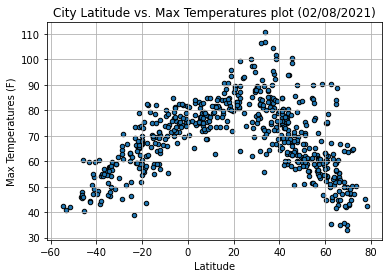

In [34]:
scatter_plot(y="Max Temp", y_label="Max Temperatures", y_units="F")


As we see in this plot above, as we get closer to the latitude 0 (closer to the Ecuator), the temperatures are higher.

## Latitude vs. Humidity Plot

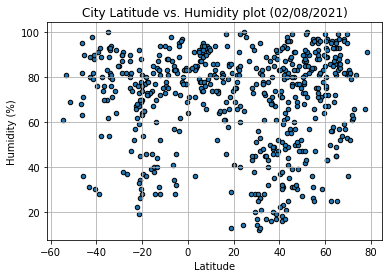

In [35]:
scatter_plot(y="Humidity", y_label="Humidity", y_units="%")

As we see in this plot above, most of the cities have higher humidity rather then lower humidity

## Latitude vs. Cloudiness Plot

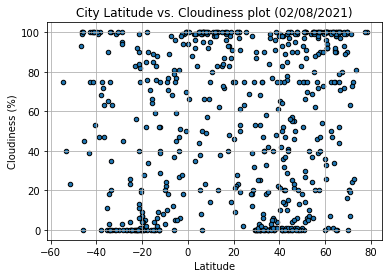

In [36]:
scatter_plot(y="Cloudiness", y_label="Cloudiness", y_units="%")

We do not see a significant difference in cloudiness based on latitude

## Latitude vs. Wind Speed Plot

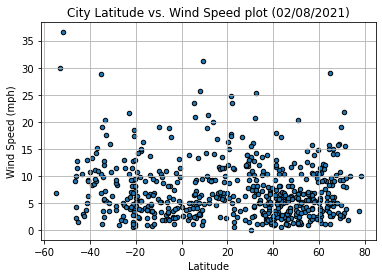

In [37]:
scatter_plot(y="Wind Speed", y_label="Wind Speed", y_units="mph")

Most of the cities have a lower rate of wind speed rather than a higher rate.

## Linear Regression

In [47]:
north = clean_city_data[clean_city_data["Lat"]>=0]
south = clean_city_data[clean_city_data["Lat"]<0]
def linear_regression(x_values, y_values, title, y_label, annotate_x_y):
    x_values = x_values
    y_values  = y_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"r-value is: {rvalue}")
    plt.scatter(x_values,y_values, edgecolor = "black")
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annotate_x_y, fontsize=15,color="red")

    # Label plot
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.savefig(f"./output_data/{title}.png")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: -0.6301929404148653


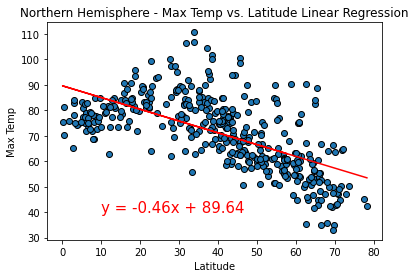

In [48]:

x_values_n = north["Lat"]
y_values  = north["Max Temp"]

# Label plot
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
linear_regression(x_values_n, y_values, title, "Max Temp", (10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.7968267059956202


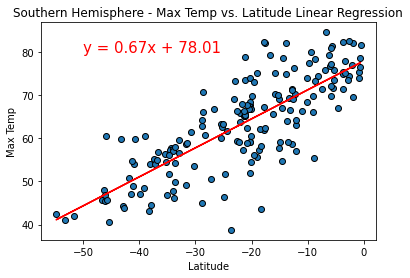

In [50]:
x_values_s = south["Lat"]
y_values  = south["Max Temp"]

# Label plot
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
linear_regression(x_values_s, y_values, title, "Max Temp", (-50,80))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.0070021739871492135


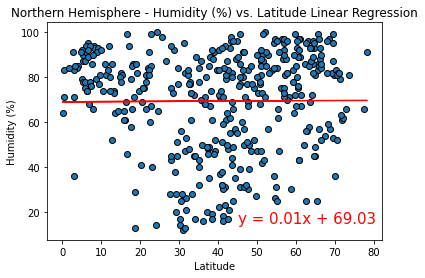

In [56]:
y_values  = north["Humidity"]

# Label plot
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
linear_regression(x_values_n, y_values, title, "Humidity (%)", (45,15))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: -0.05033995966079026


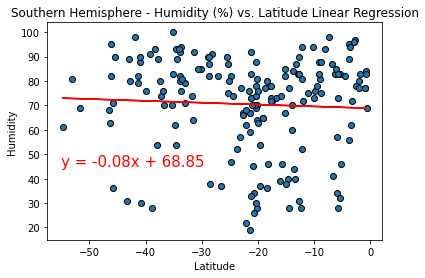

In [59]:
y_values  = south["Humidity"]

# Label plot
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
linear_regression(x_values_s, y_values, title, "Humidity", (-55,45))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: -0.007578977878731682


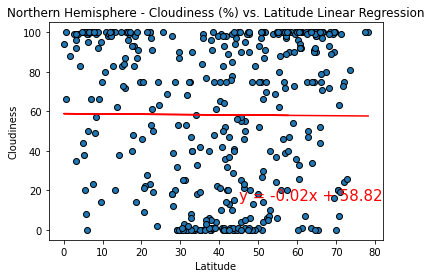

In [60]:
y_values  = north["Cloudiness"]

# Label plot
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
linear_regression(x_values_n, y_values, title, "Cloudiness", (45,15))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: -0.08491380111970188


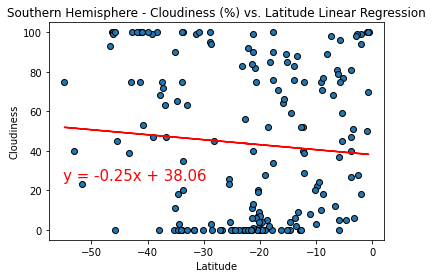

In [63]:
y_values  = south["Cloudiness"]

# Label plot
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
linear_regression(x_values_s, y_values, title, "Cloudiness", (-55,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.08264156618070094


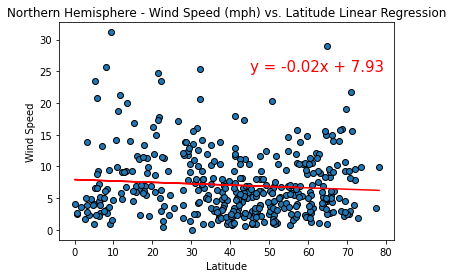

In [65]:
y_values  = north["Wind Speed"]

# Label plot
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
linear_regression(x_values_n, y_values, title, "Wind Speed", (45,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.2773412146963809


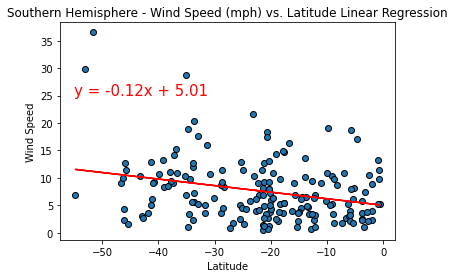

In [66]:
y_values  = south["Wind Speed"]

# Label plot
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
linear_regression(x_values_s, y_values, title, "Wind Speed", (-55,25))